In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

from skimage.data import coins 
from PIL import Image               

In [13]:
def xor (cadena1, cadena2):
    y = int(cadena1, 2)^int(cadena2,2)
    y = bin(y)[2:].zfill(len(cadena1))
    return y

In [2]:
def lfsr(seed, taps):
    sr, xor = seed, 0
    while 1:
        for t in taps:
            xor += int(sr[t-1])
        if xor%2 == 0.0:
            xor = 0
        else:
            xor = 1
        print(xor)
        sr, xor = str(xor) + sr[:-1], 0
        print(sr)
        if sr == seed:
            break

In [3]:
lfsr('11001001', (8,7,6,1)) 

0
01100100
1
10110010
0
01011001
1
10101100
0
01010110
0
00101011
0
00010101
0
00001010
1
10000101
1
11000010
0
01100001
1
10110000
1
11011000
1
11101100
0
01110110
0
00111011
0
00011101
0
00001110
0
00000111
1
10000011
1
11000001
0
01100000
0
00110000
0
00011000
0
00001100
1
10000110
1
11000011
1
11100001
0
01110000
0
00111000
0
00011100
1
10001110
1
11000111
0
01100011
0
00110001
1
10011000
1
11001100
0
01100110
0
00110011
0
00011001
1
10001100
0
01000110
0
00100011
0
00010001
1
10001000
1
11000100
0
01100010
1
10110001
0
01011000
0
00101100
1
10010110
1
11001011
1
11100101
1
11110010
0
01111001
1
10111100
0
01011110
0
00101111
1
10010111
0
01001011
0
00100101
0
00010010
1
10001001
0
01000100
1
10100010
0
01010001
1
10101000
1
11010100
0
01101010
1
10110101
1
11011010
0
01101101
0
00110110
0
00011011
0
00001101
0
00000110
0
00000011
0
00000001
1
10000000
1
11000000
1
11100000
1
11110000
1
11111000
1
11111100
0
01111110
0
00111111
1
10011111
0
01001111
1
10100111
0
01010011
0
00101001

In [4]:
def img2bits(I):
    m, n = I.shape
    s = ''
    for i in range(0, m):
        for j in range(0, n):
            s = s + '{0:08b}'.format(I[i,j])
    return s

In [5]:
def bits2img(x, shape):
    m, n = shape
    I = np.zeros(m*n).astype(np.uint8)
    bts = re.findall('........', x)
    for i in range(0, len(bts)):
        I[i] = int(bts[i], 2)
    I = I.reshape(m,n)
    return I

In [6]:
I = coins()
J = Image.fromarray(I)
J = J.resize((J.size[0]//2, J.size[1]//2), Image.LANCZOS)
I = np.array(J)

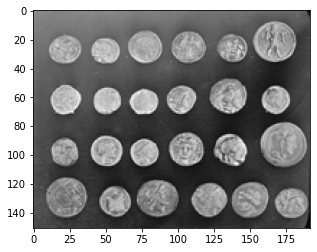

In [7]:
plt.figure()
plt.imshow(I, cmap='gray')
plt.show()

In [8]:
s1 = img2bits(I)

In [21]:
s = '001100100110110010001011001110101100001010110000101011000010101000001010110000101111000010001100001110110000111011000111101100001110110000111011000011101000001110000000111110000011111000001001100000000110000000011000000001100110000110111000011111100001001110000000111000000011100110001110111000111001100011000110001110011000111001100001100110000110011000011001110001100001000110000100011000010001110001000111000100001100010110110001001011000000101100110010110111001011111100101111110010001111001110111100001011110000101111110010111001001011000100101000010010110001001001000100110100010001010001110101000111010100001101010110110101111011010001101101000110110000011011000001101000000110000000011000000001110000000111000000111100000111110000111111000111111100001111110000111111110011111001001111110100111001010011000101001110010100001001010110100101111010010001101001110110100001011010110101101111010110111101011111110101111111010001111101000111110000011111110001111001000111110100011111010001001101000000110100110011010001001101000100110000010011000001001110000100001000010110100001001010000000101000000010100110001010001000101000100010110010001001001000000100100110010010001001001110100100001010010110101001001010100110101010001010101000101010110010101111001010001100101000110010110011001001001100110100110111010011111101001001110100110111010001011101000101110000010111110001011111000101111100010001110001110111000111011100001101110000110111110011011111001101111100110111110011111111001001111100110111110111011111001101111110110111001011011000101101000010110000001011000000101000000010110000001001000000000100000000010000000001000000000100110000010001000001110100000111010000111101000111110100001111010110111101111011110111101111001110111110111011111011101111101110111110111001111011000111101000011110000001111110000111001000011000100001110010000111001000111100100001110010110111001001011100110101110111010111001101011000110101000011010110001101111000110111100011111110001001111000000111100110011110111001111001100111110110011111011001001101100110110110111011011111101101111110110111111011111111101111111110111111111001111111110111111001011111110101111001010111110101011111010101111101010001110101000111010110011101111001110111100111001110011000111001110011100001001110000100111110010011111001001'

#### CADENA LARGA

In [37]:
s2 = s*101

In [29]:
s3 = xor(s1,s2)

In [30]:
I2 = bits2img(s2, I.shape)
I3 = bits2img(s3, I.shape)
I1 = bits2img(xor(s2,s3), I.shape)

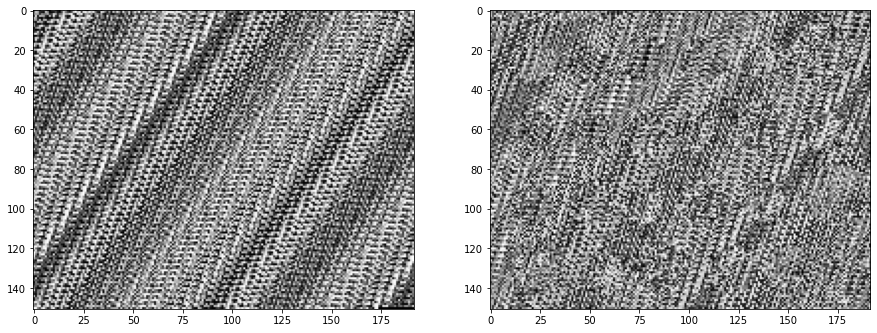

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3, cmap='gray')
plt.show()

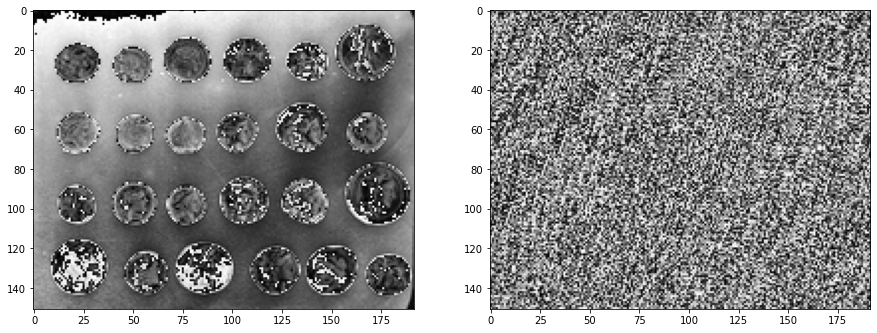

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3-I2, cmap='gray')
plt.show()

#### CADENA MEDIANA 

In [57]:
s2 = s*75

In [58]:
print(s2)

0011001001101100100010110011101011000010101100001010110000101010000010101100001011110000100011000011101100001110110001111011000011101100001110110000111010000011100000001111100000111110000010011000000001100000000110000000011001100001101110000111111000010011100000001110000000111001100011101110001110011000110001100011100110001110011000011001100001100110000110011100011000010001100001000110000100011100010001110001000011000101101100010010110000001011001100101101110010111111001011111100100011110011101111000010111100001011111100101110010010110001001010000100101100010010010001001101000100010100011101010001110101000011010101101101011110110100011011010001101100000110110000011010000001100000000110000000011100000001110000001111000001111100001111110001111111000011111100001111111100111110010011111101001110010100110001010011100101000010010101101001011110100100011010011101101000010110101101011011110101101111010111111101011111110100011111010001111100000111111100011110010001111101000111110100010011010000

In [59]:
s3 = xor(s1,s2)

In [60]:
I2 = bits2img(s2, I.shape)
I3 = bits2img(s3, I.shape)
I1 = bits2img(xor(s2,s3), I.shape)

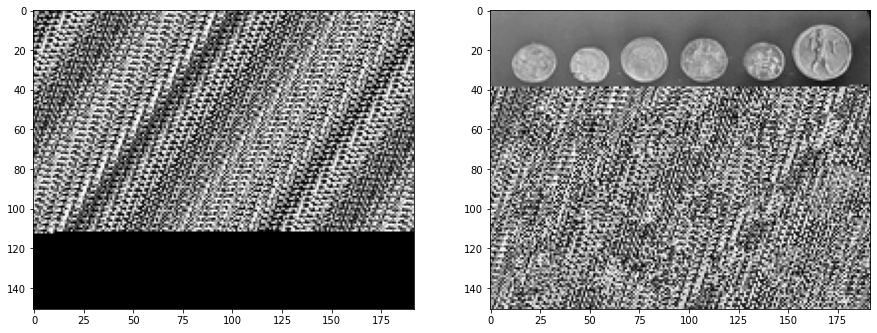

In [61]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3, cmap='gray')
plt.show()

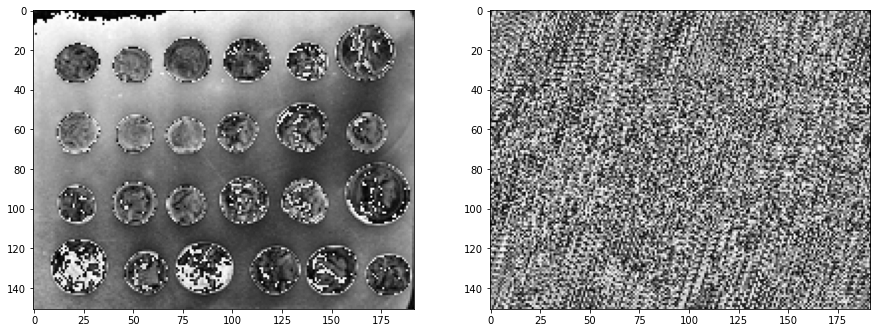

In [62]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3-I2, cmap='gray')
plt.show()

#### CADENA PEQUEÑA

In [40]:
s2 = s

In [41]:
s3 = xor(s1,s2)

In [42]:
I2 = bits2img(s2, I.shape)
I3 = bits2img(s3, I.shape)
I1 = bits2img(xor(s2,s3), I.shape)

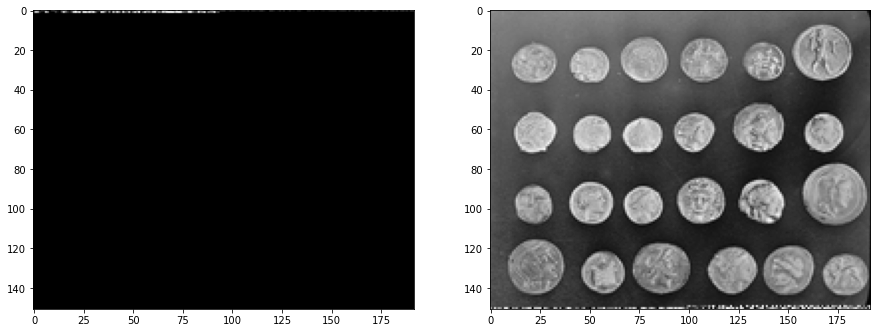

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3, cmap='gray')
plt.show()

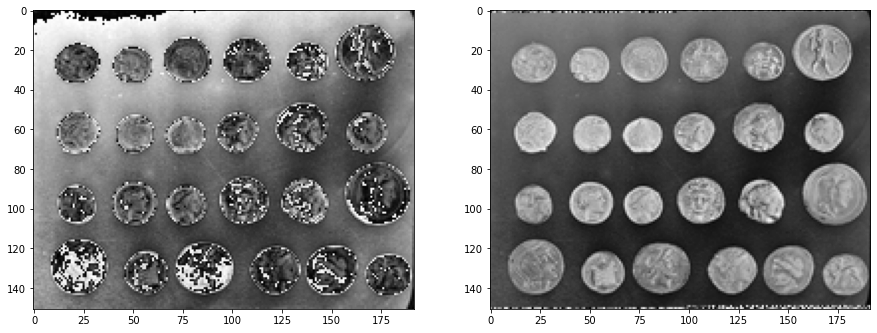

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(I1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I3-I2, cmap='gray')
plt.show()